# P02_2_Modeling

# Recap for Categorical features

* x3 is nominal categorical feature (needs OneHotEncoder transformer) and custom function edit is needed
* x7 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.
* x19 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.
* x24 column: is nominal category and needs to be transformed using One Hot Encoding
* x31 column: is nominal category and needs to be transformed using One Hot Encoding
* x33 column: is nominal category and needs to be transformed using One Hot Encoding
* x39 should be droped the column 
* x60 is nominal and OneHotEncoder should be used to transfer this column
* x65 is nominal and OneHotEncoder should be used to transfer this column
* x77 is nominal and OneHotEncoder should be used to transfer this column
* x93 is nominal and OneHotEncoder should be used to transfer this column
* X99 should be droped - it has just one category. 
* The x24, x33, and x77 columns NaN values needs to be replaced by their mode.


# Recap for Numerical features


- Column 'x30', 'x44', 'x57' have more than 50% nan and should be droped
- Three features inside the numeric df need to be transformed using One Hot Encoding. These are features with 0-1 values and should be treated like category features. These are 0-1 features and should be treated like category features. columns are x59 and x79 and x98
- I may use Isolation Forest or LOF for outlier detection. I will check the AUC to see the differences.
- cols with high skewness are ```['x13', 'x21', 'x32', 'x35', 'x44', 'x59', 'x67', 'x73', 'x75', 'x79', 'x84', 'x89']```. I will apply power transformer.

- High score numerical features are as follow:
```['x16', 'x18', 'x28', 'x32', 'x35', 'x40', 'x47', 'x52', 'x57', 'x62', 'x68', 'x70', 'x75', 'x78', 'x81', 'x88', 'x89', 'x95', 'x96']```
- With n_components=12, I get 0.62 AUC and as it is seen 12 principal components have 62٪ of variance. I may apply PCA if I found not using it computationally time expensive.


## import libraries

In [1]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle
from sklearn.pipeline import make_pipeline, Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import re
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

In [5]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [7]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot


In [10]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [11]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
%config InlineBackend.figure_format = 'retina'

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Read data set

In [15]:
file_path = "../DataSet/"
file_name = "exercise_40_train.csv"
df = pd.read_csv(file_path+file_name)

In [16]:
df.shape

(40000, 101)

In [17]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


In [18]:
df_numeric_features = df.drop(['y'],axis=1)

In [19]:
df.dtypes.value_counts()

float64    86
object     12
int64       3
dtype: int64

In [20]:
df_numeric_features = df.select_dtypes(include=['float64', 'int64'])
df_numeric_features = df_numeric_features.drop(['y'],axis=1)

In [21]:
df_cat_features = df.select_dtypes(include=['object'])
df_cat_features.head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


# Make custom transformation for categorical features

In [22]:
def custom_edit_x3(df_categ):
    
    # https://stackoverflow.com/questions/60237488/python-replace-only-exact-word-in-string
    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSun\b', 'Sunday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bSat\b', 'Saturday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bFri\b', 'Friday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bWed\b', 'Wednesday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bMon\b', 'Monday', string)

    for i, string in enumerate(df_categ['x3'].values):
        df_categ['x3'].values[i] = re.sub(r'\bThur\b', 'Thursday', string)
    return df_categ
    
    return df_categ

make a column transformer fucntion and make sure it works

In [23]:
custom_edit_x3_tf = FunctionTransformer(custom_edit_x3)
ct = make_column_transformer((custom_edit_x3_tf, ['x3']))

In [24]:
x3_pipe = make_pipeline(custom_edit_x3_tf, SimpleImputer(strategy="most_frequent"), OneHotEncoder())
ct = make_column_transformer((x3_pipe, ['x3']))
ct.fit_transform(df).toarray()[0].size

7

In [25]:
def custom_edit_x7(df):
    df = df.apply(lambda x: (x.str.replace('%','')))

    return (np.float_(df))

custom_edit_x7_tf = FunctionTransformer(custom_edit_x7)
ct = make_column_transformer((custom_edit_x7_tf, ['x7']))
x7 = ct.fit_transform(df)

In [26]:
def custom_edit_x19(df):
    df = df.apply(lambda x: (x.str.replace('$','')))

    return (np.float_(df))

custom_edit_x19_tf = FunctionTransformer(custom_edit_x19)
ct = make_column_transformer((custom_edit_x19_tf, ['x19']))
x19 = ct.fit_transform(df)

In [27]:
two_step_transformer_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                                     OneHotEncoder())

In [28]:
two_step_transformer_pipe.fit_transform(df[['x24','x31','x33','x60','x65','x77','x93']]).toarray()[0].size

81

In [29]:
ct = make_column_transformer((x3_pipe, ['x3']),
                             (two_step_transformer_pipe, ['x24','x31','x33','x60','x65','x77','x93']),
                            )

In [30]:
ct.fit_transform(df).toarray()[0].size

88

In [31]:
numer_OHE_x59_x79_x98 = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                        OneHotEncoder())

numer_OHE_x59_x79_x98.fit_transform(np.array(df['x59']).reshape(-1, 1)).toarray()[0].size

2

In [32]:
len(numer_OHE_x59_x79_x98.fit_transform(np.array(df['x59']).reshape(-1, 1)).toarray())

40000

In [33]:
ct = make_column_transformer((numer_OHE_x59_x79_x98, ['x59', 'x79', 'x98']))

In [34]:
ct.fit_transform(df)

array([[1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       ...,
       [1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.]])

In [35]:
numer_skewness = make_pipeline(SimpleImputer(strategy="mean"), 
                               StandardScaler(),
                                PowerTransformer(),
#                                VarianceThreshold(),
                              )

numer_skewness.fit_transform(np.array(df['x13']).reshape(-1, 1))

array([[ 0.52252661],
       [-0.98789216],
       [-1.11580409],
       ...,
       [-0.26185934],
       [-2.10399184],
       [-0.25390223]])

In [36]:
ct = make_column_transformer((numer_skewness, ['x13', 'x21', 'x32', 'x35', 
                                               'x44', 'x59', 'x67', 'x73', 
                                               'x75', 'x79', 'x84', 'x89']))

In [37]:
ct.fit_transform(df)

array([[ 0.52252661,  1.6190496 , -0.68519579, ...,  0.42510903,
        -2.88844405,  0.15809134],
       [-0.98789216, -0.40425833,  0.60652813, ..., -1.8907331 ,
         0.0591937 ,  0.08691384],
       [-1.11580409,  0.16008288,  1.24974419, ...,  0.42510903,
         0.0591937 ,  0.21667148],
       ...,
       [-0.26185934, -0.73586194,  0.13156308, ...,  0.42510903,
         2.05710353, -1.38447206],
       [-2.10399184,  0.05575166,  1.33614618, ...,  0.42510903,
         0.0591937 ,  0.21667148],
       [-0.25390223, -0.87867438,  0.34614004, ...,  0.42510903,
         0.0591937 ,  0.21667148]])

In [38]:
rest_numeric_features = []
for col in df_numeric_features.columns:
    if col != ['x13', 'x21', 'x32', 'x35', 'x44', 'x59', 'x67', 'x73', 'x75', 'x79', 'x84', 'x89']:
        rest_numeric_features.append(col)
print(rest_numeric_features)       

['x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100']


In [39]:
Rest_numeric_features = make_pipeline(SimpleImputer(strategy="mean"), 
                               StandardScaler(),
                                PowerTransformer(),
#                                VarianceThreshold(),
#                             PCA(n_components=20),
                                     )

# Rest_numeric_features.fit_transform(np.array(df['x1']).reshape(-1, 1))

In [40]:
ct = make_column_transformer((Rest_numeric_features, rest_numeric_features))

In [41]:
ct.fit_transform(df)

array([[-1.52210183, -1.21321633,  0.73538846, ..., -1.19734632,
        -0.99531099,  0.80499414],
       [-0.21778515, -0.99034322,  1.01178638, ...,  0.25640949,
         1.0047111 ,  0.22810827],
       [ 0.75277741, -0.50800169,  0.09907159, ..., -1.10434356,
        -0.99531099,  1.77989024],
       ...,
       [-0.62132649, -1.36064831, -0.39842492, ..., -1.17905537,
         1.0047111 , -0.0022491 ],
       [ 0.53960265,  0.17657422,  0.29347708, ..., -0.68188951,
        -0.99531099,  1.80192371],
       [-0.14750603, -2.22596216, -0.79910404, ...,  1.26723974,
         1.0047111 ,  1.96954651]])

# Combining all transformers into one 

In [42]:
ct_all_features = make_column_transformer((x3_pipe, ['x3']),
                            (two_step_transformer_pipe, ['x24','x31','x33',
                                                         'x60','x65','x77','x93']),
                            (numer_OHE_x59_x79_x98, ['x59', 'x79', 'x98']),
                             
                             # features with high skewness 
                            (numer_skewness, ['x13', 'x21', 'x32', 'x35', 
                                              'x44', 'x59', 'x67', 'x73', 
                                              'x75', 'x79', 'x84', 'x89']),
                             
                             # features from categories-> edited to numeric-no null found
                             (custom_edit_x7_tf, ['x7']),
                             (custom_edit_x19_tf, ['x19']),
                             
                             # rest numeric features
                             (Rest_numeric_features, rest_numeric_features),
                            )

ct_all_features.fit_transform(df)[0].size

196

so far so good.

In [43]:
weights = {0:0.85, 1:0.14}
logreg = LogisticRegression(solver='sag', class_weight=weights)

In [44]:
X_all_features = df.drop(columns=['y'], axis=1)
y = df['y']

In [45]:
Final_pipe = make_pipeline(ct_all_features, logreg) # PCA(n_components=5)
cross_val_score(Final_pipe, X_all_features, y, cv=5, scoring='roc_auc', n_jobs=-1)

array([0.52457943, 0.5264359 , 0.55156958, 0.52544439, 0.53161902])

In [46]:
Final_pipe.fit(X_all_features,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function custom_edit_x3 at 0x7fa301f3a378>)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['x3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImput...
                

In [47]:
y_pred = Final_pipe.predict(X_all_features)

In [48]:
metrics.confusion_matrix(y,y_pred)

array([[34197,     0],
       [ 5803,     0]])

# PCA

- LogisticRegression

Dimensionality reduction

In [49]:
from tqdm import tqdm

In [50]:
# get the dataset
def get_dataset():
    # 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    X = df.drop(columns=['y'], axis=1)
    y = df['y']
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,10):

        Final_pipe = make_pipeline(ct_all_features, PCA(n_components=i), logreg)
        models[str(i)] = Final_pipe
        
# 		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
# 		models[str(i)] = Pipeline(steps=steps)
        
        
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in tqdm(models.items()):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

100%|██████████| 9/9 [08:05<00:00, 53.91s/it]


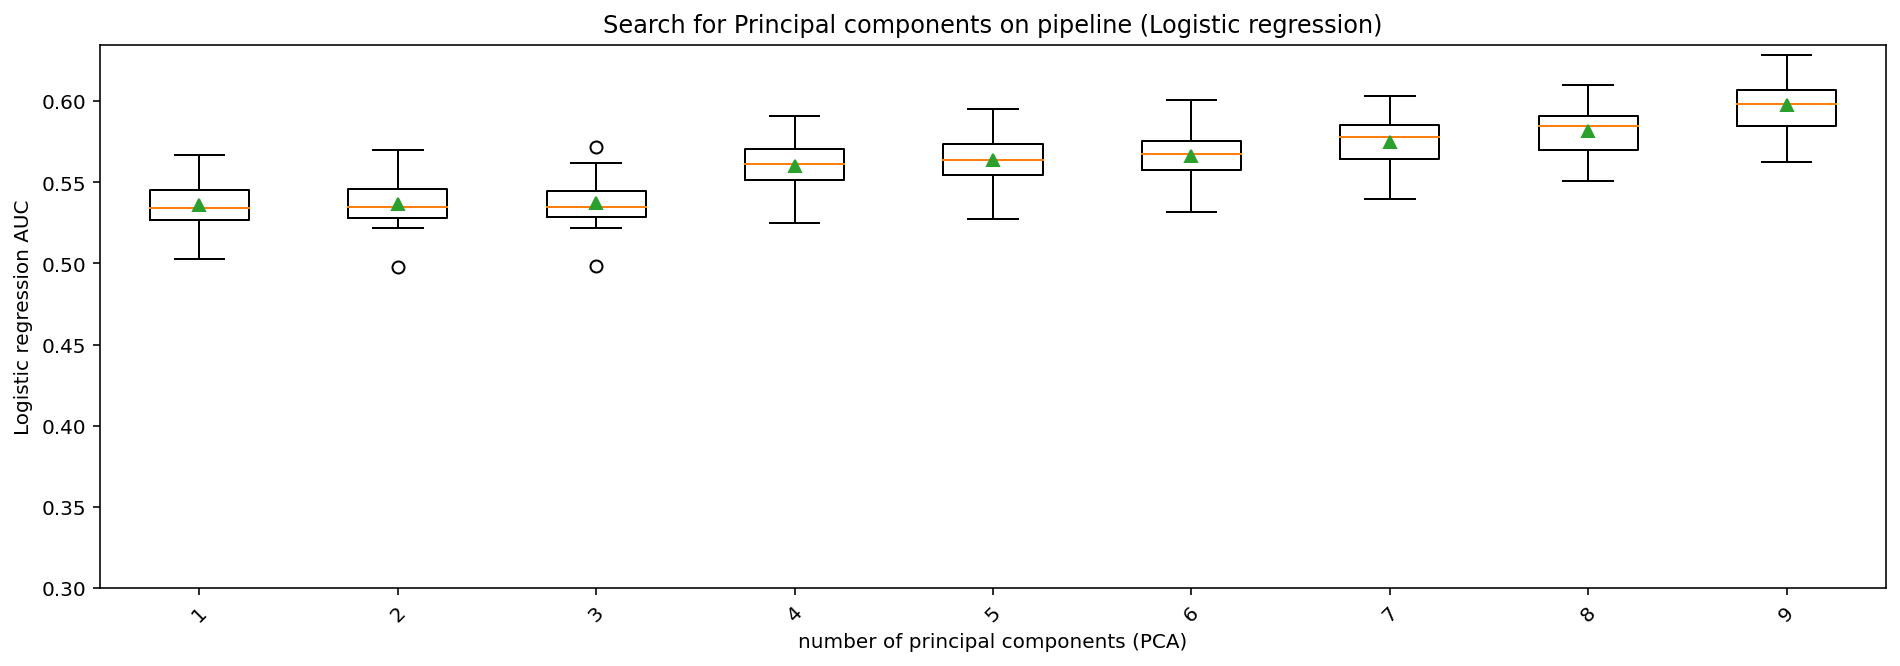

In [51]:
plt.figure(figsize=(16,5))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
plt.ylabel('Logistic regression AUC')
plt.xlabel('number of principal components (PCA)')
plt.title('Search for Principal components on pipeline (Logistic regression)')
plt.ylim(0.3,)
pyplot.show()

- MLP

In [52]:
from sklearn.neural_network import MLPClassifier

In [53]:
clf = MLPClassifier(random_state=1, max_iter=300)
# Final_pipe = make_pipeline(ct_all_features, clf)
# cross_val_score(Final_pipe, df, y, cv=5, scoring='roc_auc', n_jobs=-1)

I just need to modify the get model function

In [54]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(10,20):
        Final_pipe = make_pipeline(ct_all_features, PCA(n_components=i), clf)
        models[str(i)] = Final_pipe

    return models

In [55]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in tqdm(models.items()):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

100%|██████████| 10/10 [11:33<00:00, 69.37s/it]


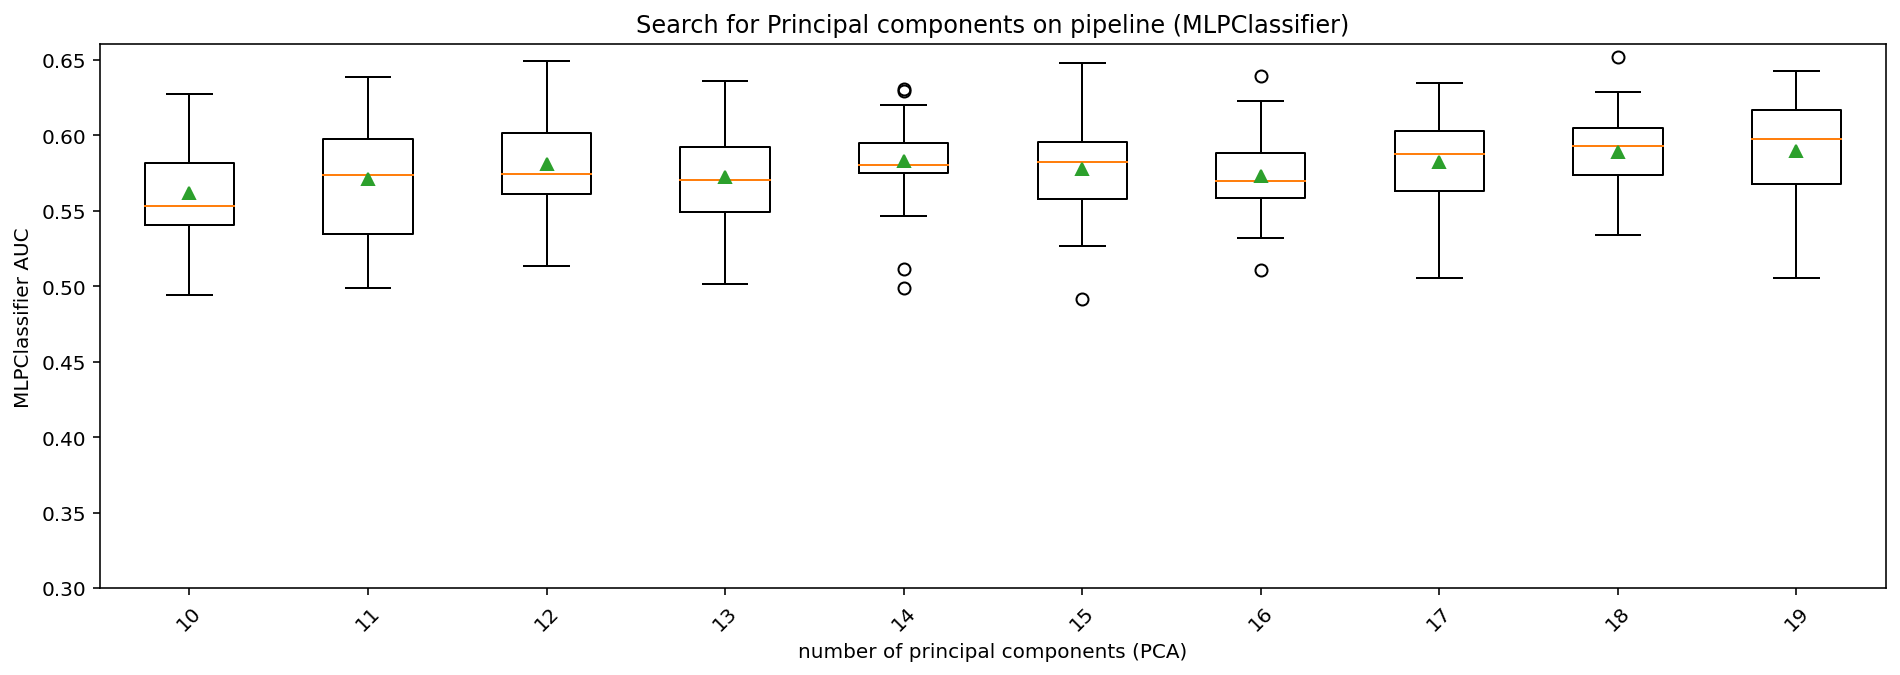

In [56]:
plt.figure(figsize=(16,5))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
plt.ylabel('MLPClassifier AUC')
plt.xlabel('number of principal components (PCA)')
plt.title('Search for Principal components on pipeline (MLPClassifier)')
plt.ylim(0.3,)
pyplot.show()

using all features and MLP

In [57]:
clf = MLPClassifier(random_state=1, max_iter=300)
Final_pipe = make_pipeline(ct_all_features, clf)
cross_val_score(Final_pipe, df, y, cv=5, 
                scoring='roc_auc', n_jobs=-1)

array([0.71408815, 0.74299607, 0.7497773 , 0.750639  , 0.71121597])

I don't use the PCA for now

# Pipes & transformers using MLP classifier

Adding VarianceThreshold to pipeline and check out the outcomes

In [79]:
# x3 pipe
x3_pipe = Pipeline([('custom_edit_x3_tf', custom_edit_x3_tf), 
                   ('imp', SimpleImputer(strategy="most_frequent")), 
                   ('ohe', OneHotEncoder())])
# two tf pipe
two_step_transformer_pipe = Pipeline([('imp', SimpleImputer(strategy="most_frequent")), 
                                                     ('ohe',OneHotEncoder())])

# numeric -> categ OHE pipe
numer_OHE_x59_x79_x98_pipe = Pipeline([('imp_ohe', SimpleImputer(strategy="most_frequent")), 
                                        ('ohe',OneHotEncoder())])

# numeric skewness tf
numer_skewness_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                                ('p_tf',PowerTransformer()),
                               ('selector',VarianceThreshold(0.1)),
                              ])

# custom x7 tf
custom_edit_x7_tf = FunctionTransformer(custom_edit_x7)
# custom x19 tf
custom_edit_x19_tf = FunctionTransformer(custom_edit_x19)


# rest on nemeric feature pipe
Rest_numeric_features_pipe = Pipeline([('imp',SimpleImputer(strategy="mean")), 
                               ('scaler',StandardScaler()),
                                ('p_tf',PowerTransformer()),
                               ('selector',VarianceThreshold(0.1)),
#                             PCA(n_components=20),
                                     ])



preprocessor = make_column_transformer((x3_pipe, ['x3']),
                            (two_step_transformer_pipe, ['x24','x31','x33','x60','x65','x77','x93']),
                            (numer_OHE_x59_x79_x98_pipe, ['x59', 'x79', 'x98']),
                             
                             # features with high skewness 
                            (numer_skewness_pipe, ['x13', 'x21', 'x32', 'x35', 
                                              'x44', 'x59', 'x67', 'x73', 
                                              'x75', 'x79', 'x84', 'x89']),
                             
                             # features from categories-> edited to numeric-no null found
                             (custom_edit_x7_tf, ['x7']),
                             (custom_edit_x19_tf, ['x19']),
                             
                             # rest numeric features
                             (Rest_numeric_features_pipe, rest_numeric_features),
                             )

preprocessor.fit_transform(df)[0].size

196

In [80]:
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('custom_edit_x3_tf',
                  FunctionTransformer(func=<function custom_edit_x3 at 0x7fa301f3a378>)),
                 ('imp', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-2': Pipeline(steps=[('imp', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-3': Pipeline(steps=[('imp_ohe', SimpleImputer(strategy='most_frequent')),
                 ('ohe', OneHotEncoder())]),
 'pipeline-4': Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                 ('p_tf', PowerTransformer()),
                 ('selector', VarianceThreshold(threshold=0.1))]),
 'functiontransformer-1': FunctionTransformer(func=<function custom_edit_x7 at 0x7fa301f3aa60>),
 'functiontransformer-2': FunctionTransformer(func=<function custom_edit_x19 at 0x7fa2e42cabf8>),
 'pipeline-5': Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
      

In [81]:
# cross_val_score(Final_pipe, df, y, cv=5, 
#                 scoring='roc_auc', n_jobs=-1)

In [82]:
Final_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classiffier', MLPClassifier(random_state=1, 
                                                     max_iter=300))])

Final_pipe.fit(X_all_features,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('custom_edit_x3_tf',
                                                                   FunctionTransformer(func=<function custom_edit_x3 at 0x7fa301f3a378>)),
                                                                  ('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['x3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                          

In [83]:
# Final_pipe.predict_proba(X_all_features)

In [84]:
y_pred = Final_pipe.predict(X_all_features)
y_prob = Final_pipe.predict_proba(X_all_features)
# y_prob

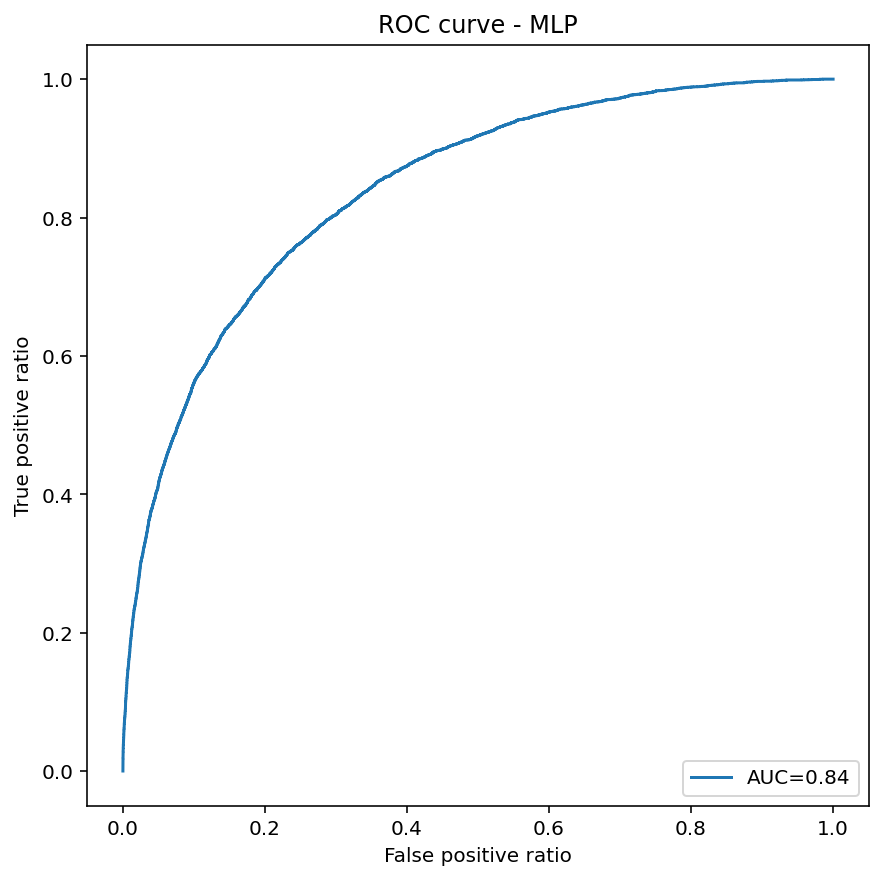

In [85]:
plt.figure(figsize=(7,7))
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y,  y_prob[:,1])
auc_mlp = metrics.roc_auc_score(y, y_prob[:,1])
plt.plot(fpr_mlp,tpr_mlp, label="AUC="+str(round(auc_mlp,2)))
plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve - MLP')
plt.savefig("../Figures/plot_02_2_roc_mlp.png")
plt.show()

In [86]:
# metrics.confusion_matrix(y,y_pred)

Accuracy, Precision, Recall
 0.875175 0.7079055441478439 0.2376357056694813


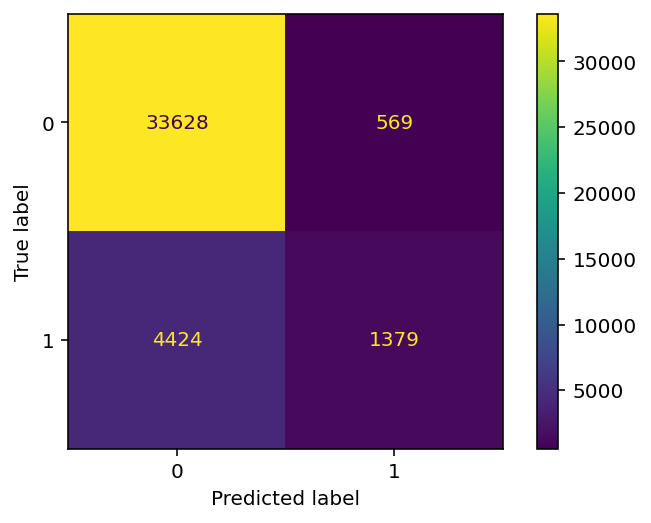

In [87]:
preds = Final_pipe.predict(X_all_features)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y, preds).ravel()

# View confusion matrix

plot_confusion_matrix(Final_pipe, X_all_features, y, 
#                       cmap='seismic', 
                     values_format='d')

Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

print('Accuracy, Precision, Recall\n',Accuracy, Precision, Recall)
plt.savefig("../Figures/plot_02_2_mlp_confusionmat.png")

# Pipes & transformers using Gradient Boosting classifier


In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
Final_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             
                             ('classiffier', GradientBoostingClassifier(n_estimators=150, 
                                                                        learning_rate=1.0,
                                                max_depth=2, random_state=0))])

Final_pipe.fit(X_all_features,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('custom_edit_x3_tf',
                                                                   FunctionTransformer(func=<function custom_edit_x3 at 0x7fa301f3a378>)),
                                                                  ('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['x3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                          

In [98]:
y_pred = Final_pipe.predict(X_all_features)
y_prob = Final_pipe.predict_proba(X_all_features)

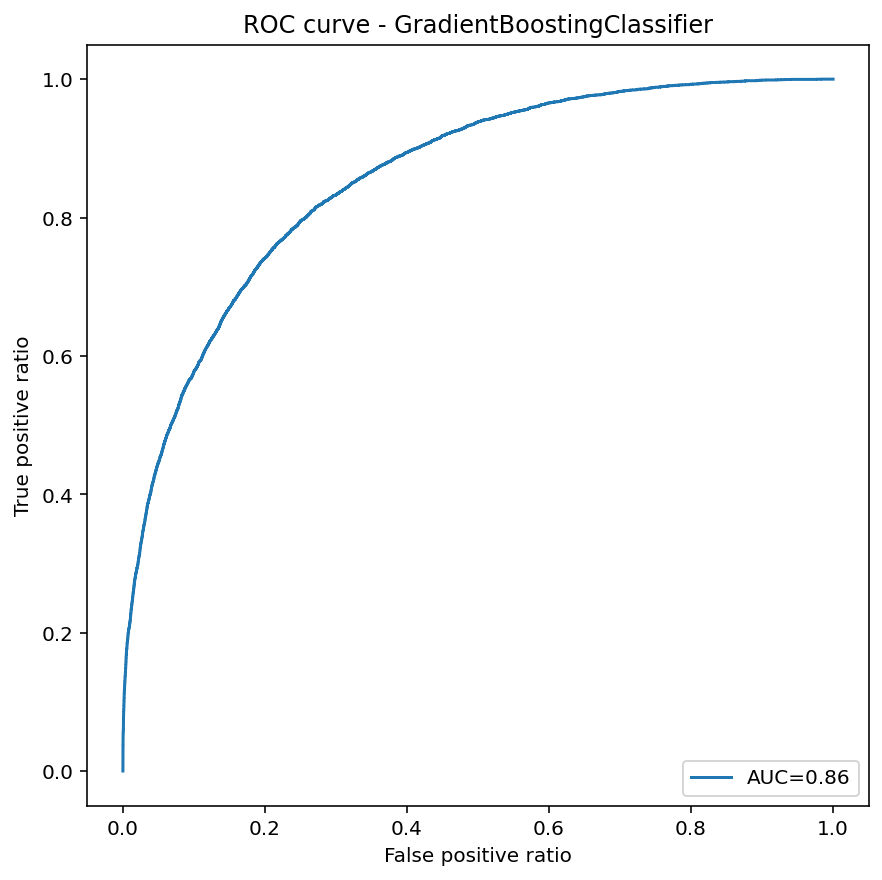

In [99]:
plt.figure(figsize=(7,7))
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr_gb, tpr_gb, _ = metrics.roc_curve(y,  y_prob[:,1])
auc_gb = metrics.roc_auc_score(y, y_prob[:,1])
plt.plot(fpr_gb,tpr_gb, label="AUC="+str(round(auc_gb,2)))
plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve - GradientBoostingClassifier')
plt.savefig("../Figures/plot_02_2_roc_GB.png")
plt.show()

Accuracy, Precision, Recall
 0.880425 0.694954128440367 0.31328623125969324


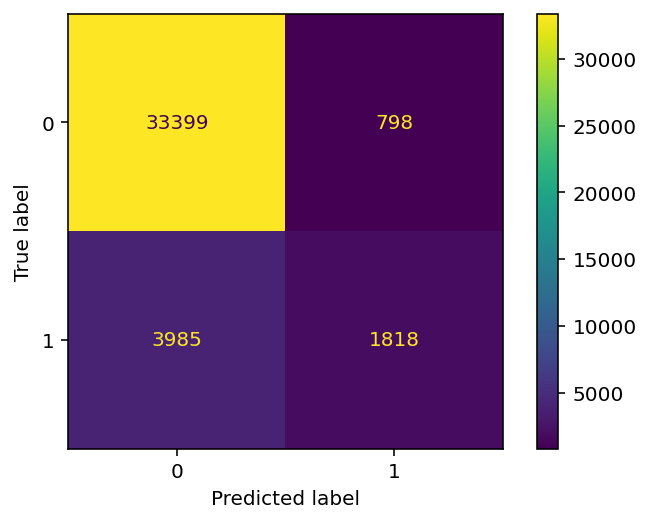

In [100]:
preds = Final_pipe.predict(X_all_features)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y, preds).ravel()

# View confusion matrix

plot_confusion_matrix(Final_pipe, X_all_features, y, 
#                       cmap='seismic', 
                     values_format='d')

Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

print('Accuracy, Precision, Recall\n',Accuracy, Precision, Recall)
plt.savefig("../Figures/plot_02_2_GB_confusionmat.png")

# Pipes & transformers using lr classifier

In [117]:
weights = {0:0.85, 1:0.14}
logreg = LogisticRegression(solver='sag', class_weight=weights)

Final_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classiffier', logreg)])

Final_pipe.fit(X_all_features,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('custom_edit_x3_tf',
                                                                   FunctionTransformer(func=<function custom_edit_x3 at 0x7fa301f3a378>)),
                                                                  ('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['x3']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                          

In [118]:
y_pred = Final_pipe.predict(X_all_features)
y_prob = Final_pipe.predict_proba(X_all_features)

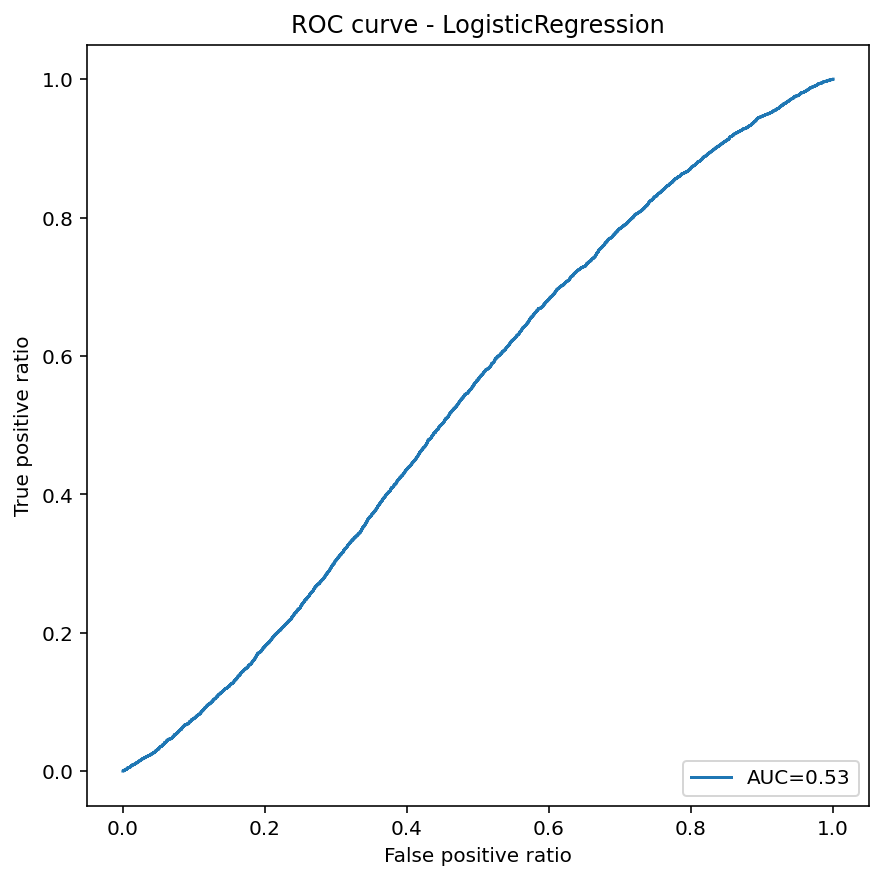

In [120]:
plt.figure(figsize=(7,7))
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr_lr, tpr_lr, _ = metrics.roc_curve(y,  y_prob[:,1])
auc_lr = metrics.roc_auc_score(y, y_prob[:,1])
plt.plot(fpr_lr,tpr_lr, label="AUC="+str(round(auc_lr,2)))
plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve - LogisticRegression')
plt.savefig("../Figures/plot_02_2_roc_lr.png")
plt.show()

Accuracy, Precision, Recall
 0.854925 nan 0.0


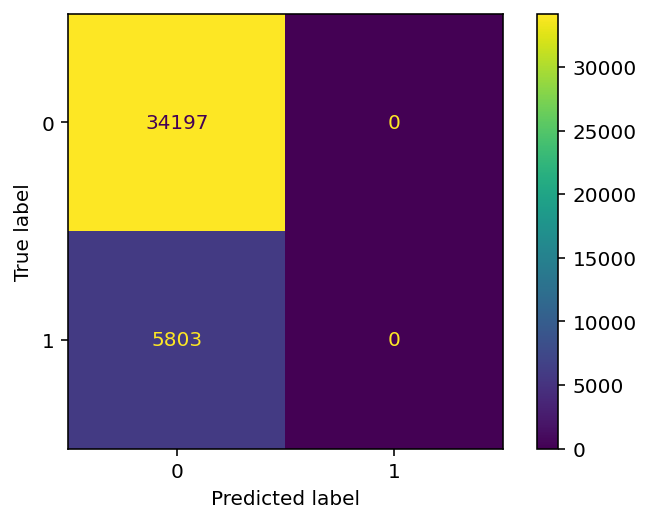

In [133]:
preds = Final_pipe.predict(X_all_features)

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y, preds).ravel()

# View confusion matrix

plot_confusion_matrix(Final_pipe, X_all_features, y, 
#                       cmap='seismic', 
                     values_format='d')

Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

print('Accuracy, Precision, Recall\n',Accuracy, Precision, Recall)
plt.savefig("../Figures/plot_02_2_lr_confusionmat.png")

# Results

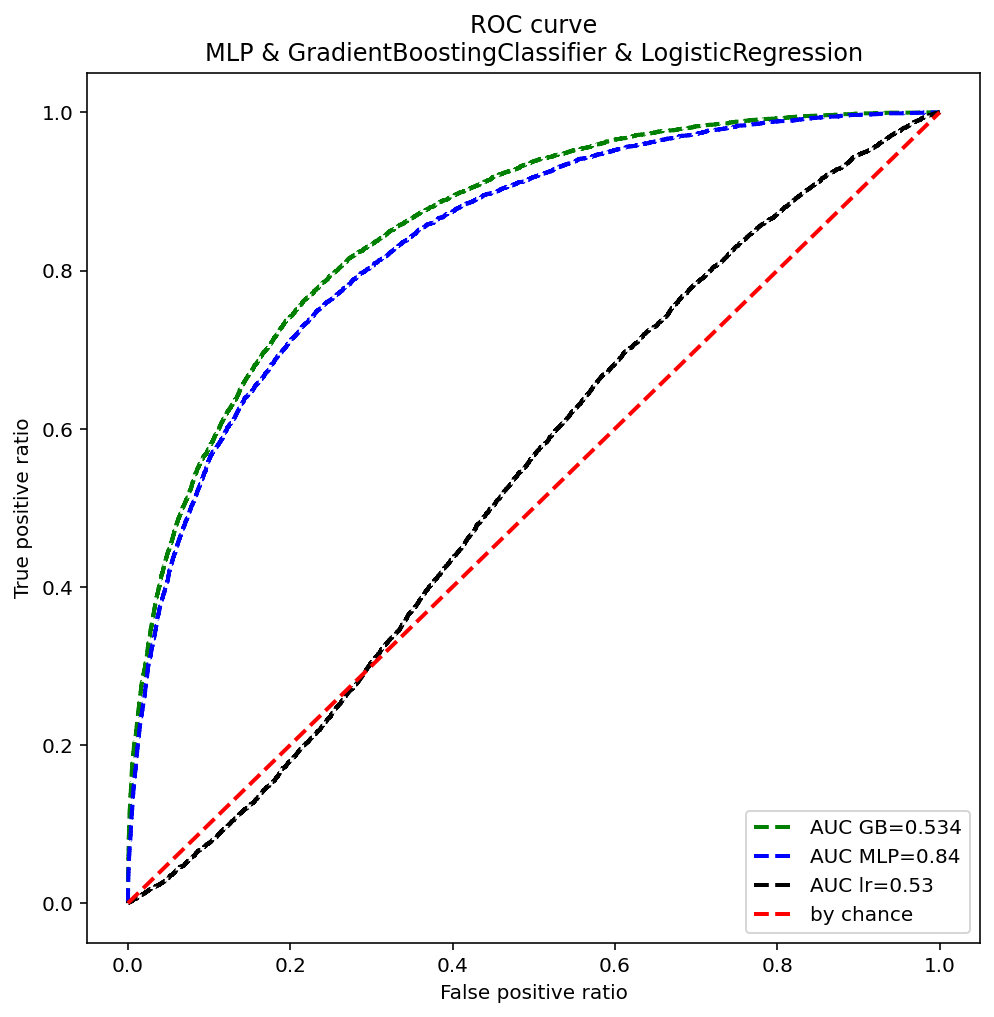

In [134]:
plt.figure(figsize=(8,8))
plt.plot(fpr_gb,tpr_gb, 'g--', linewidth=2, markersize=2,
         label="AUC GB="+str(round(auc_gb,3)))
plt.plot(fpr_mlp,tpr_mlp, 'b--', linewidth=2, markersize=2,
         label="AUC MLP="+str(round(auc_mlp,3)))
plt.plot(fpr_lr,tpr_lr, 'k--', linewidth=2, markersize=2,
         label="AUC lr="+str(round(auc_lr,2)))


plt.plot([0,1],[0,1], 'r--', linewidth=2, markersize=2,
         label='by chance')

plt.legend(loc=4)
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('ROC curve\nMLP & GradientBoostingClassifier & LogisticRegression')

plt.savefig("../Figures/plot_02_2_roc_MLP_GB_lr.png")
plt.show()

I will do grid search on GB in next part of modeling